In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import noisereduce as nr
import IPython.display as ipd
import tensorflow as tf
# Modulos extra
from numpy.random import randint

In [ ]:
def denoised_preprocess(y, sr):
    """
    Remueve el ruido de una senal
    retornando la senal original, senal sin ruido y el ruido.
    """
    # Remueve el ruido de la senal
    denoised_y = nr.reduce_noise(y = y, sr = sr,
                               n_std_thresh_stationary=1.8, # 1.5,
                               stationary=True # True
                               )
    # Hallar el ruido
    noise = y - denoised_y
    return y, denoised_y, noise

In [ ]:
rand_file = '/home/mofoko/Documents/Deep_learning_UNAL/61025001.wav'
# Rotorna el nombre de la clase y nombre del audio
clase, archivo = os.path.basename(os.path.dirname(rand_file)), os.path.basename(rand_file)
# Carga el audio
y, sr = librosa.load(rand_file)

In [ ]:
# Audio original
print(f"sigal : {clase} - {archivo}")
ipd.Audio(y, rate=sr)

sigal : Deep_learning_UNAL - 61025001.wav


In [ ]:
# Calcula la senal sin ruido
y, denoised_y, noise = denoised_preprocess(y, sr)

In [ ]:
# Audio original
print(f"Denoised sigal : {clase} - {archivo}")
ipd.Audio(denoised_y, rate=sr)

Denoised sigal : Deep_learning_UNAL - 61025001.wav


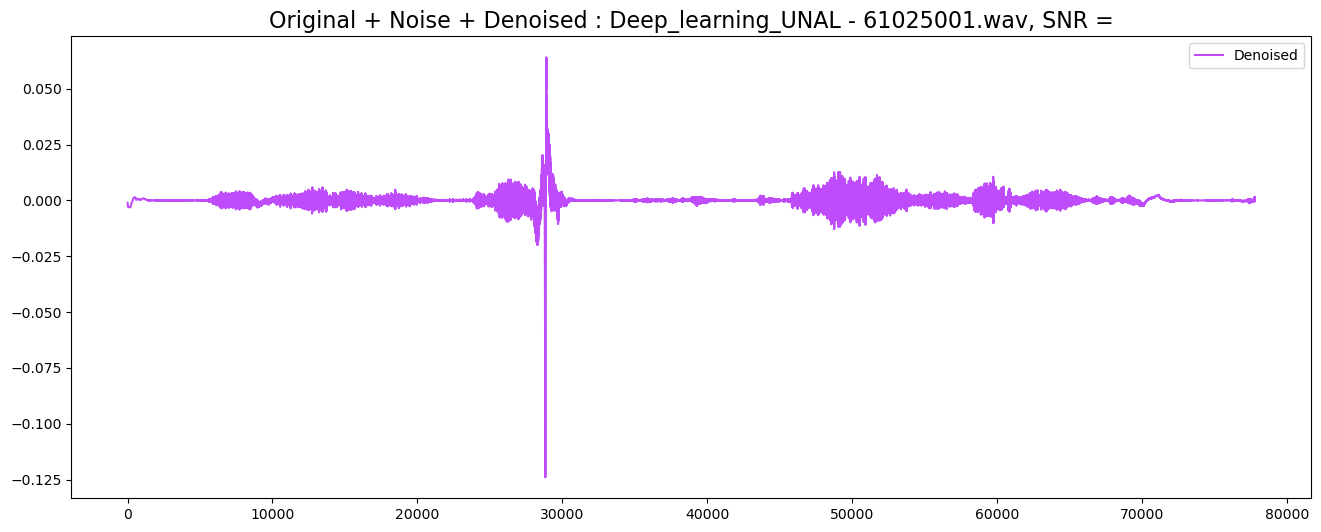

In [ ]:
# Compara las tre senales: Original, Ruido y Sin ruido
plt.figure(figsize = (16, 6))
# plt.plot(y, color = '#009DFF', label='Original')
# plt.plot(noise, color = '#FFB100', alpha=0.5, label='Noise')
plt.plot(denoised_y, color = '#A300F9', alpha=0.7, label='Denoised')
plt.title(f"Original + Noise + Denoised : {clase} - {archivo}, SNR =", fontsize=16)
plt.legend()

In [ ]:
mean_y = denoised_y.mean()
std_y = denoised_y.std()
# Definir umbral
threshold = mean_y + 1 * std_y

In [ ]:
# Define the length of each frame in seconds
f_l = 0.05
# Convert frame length from seconds to samples
f_l_samples = int(f_l * sr)
frame_length = f_l_samples
hop_length =f_l_samples
# Use librosa to split the audio into frames
frames = librosa.util.frame(np.arange(len(denoised_y)),
                            frame_length = frame_length,
                            hop_length =hop_length
                           )
frame_idx = [(i * hop_length+1,
                  i * hop_length + frame_length) for i in range(frames.shape[1])]

denoised_y_framed = [denoised_y[frame_idx[i][0]:frame_idx[i][1]] for i in range(len(frame_idx))]
denoised_y_framed = np.array(denoised_y_framed)
print(denoised_y_framed.shape)

(70, 1101)


Text(0.5, 1.0, 'Denoised framed: Deep_learning_UNAL - 61025001.wav, SNR =')

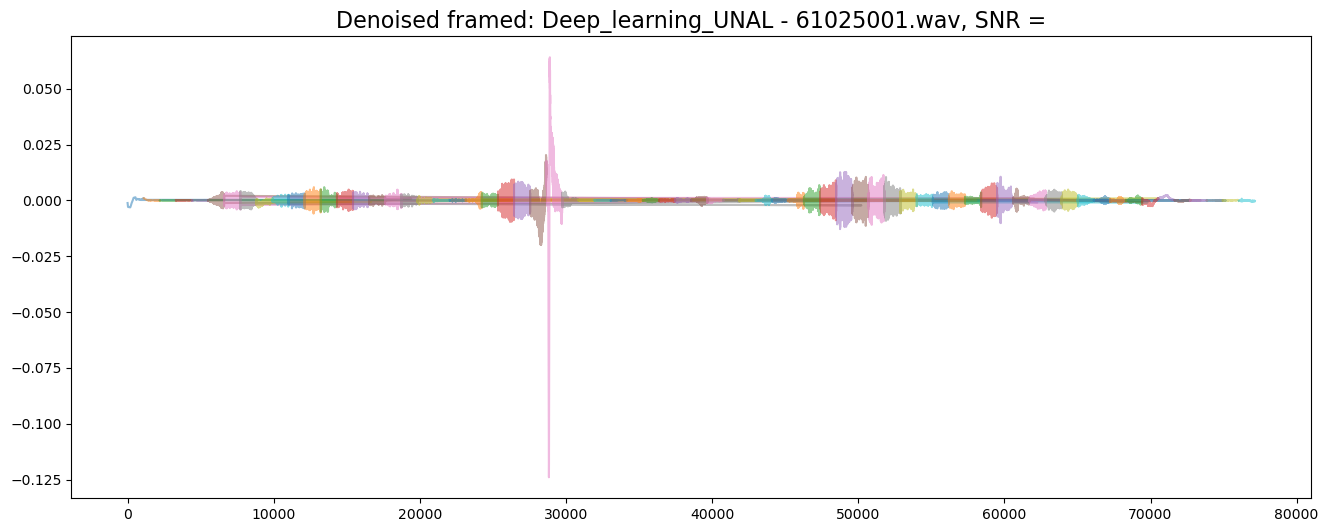

In [ ]:
dict_idx = {y : i  for i, y in enumerate(denoised_y)}
plt.figure(figsize = (16, 6))
for fram in denoised_y_framed:
    x = [dict_idx[key] for key in fram]
    plt.plot(x, fram,
             alpha=0.5, label='RMS')
plt.title(f"Denoised framed: {clase} - {archivo}, SNR =", fontsize=16)

In [ ]:
y_filtered = []
for fram in denoised_y_framed:
    if np.max(abs(fram)) >= threshold:
        y_filtered.extend(fram)
y_filtered = np.array(y_filtered)

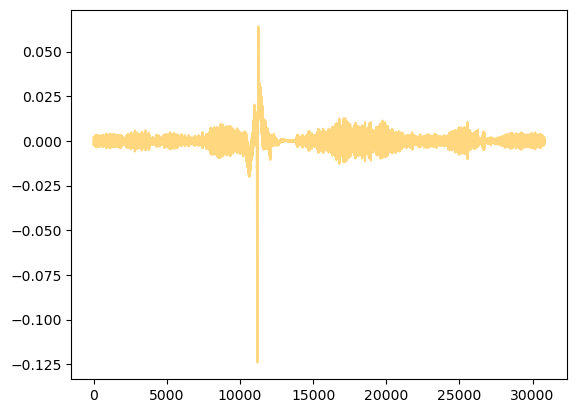

In [ ]:
plt.plot(y_filtered, color = '#FFB100', alpha=0.5, label='RMS')

In [ ]:
# Audio original
print(f"Denoised sigal : {clase} - {archivo}")
ipd.Audio(y_filtered, rate=sr)

Denoised sigal : Deep_learning_UNAL - 61025001.wav


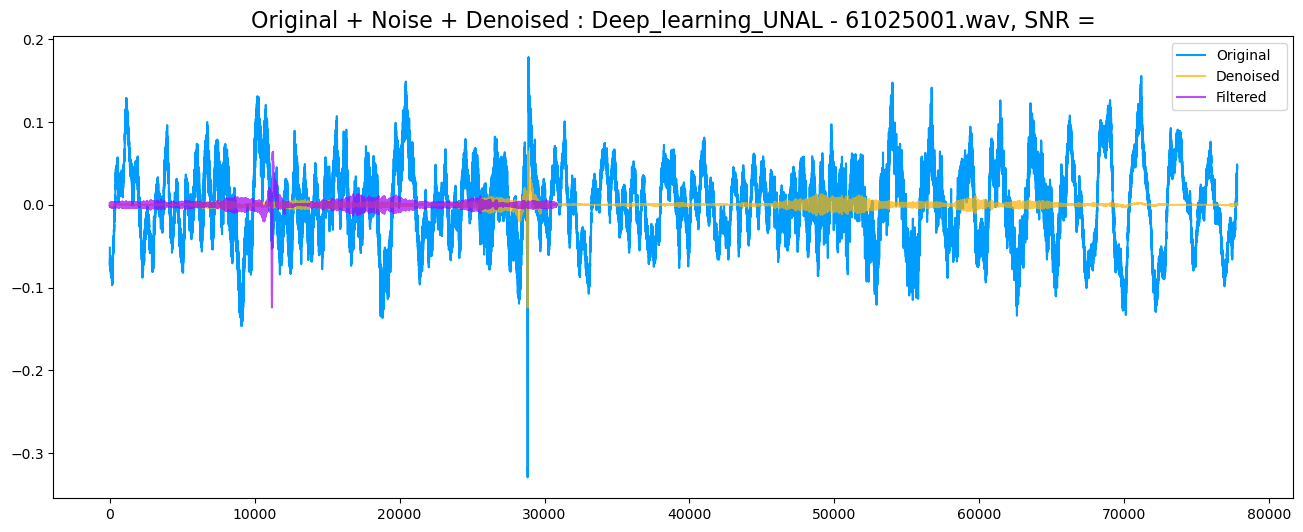

In [ ]:
# Compara las tre senales: Original, Ruido y Sin ruido
plt.figure(figsize = (16, 6))
plt.plot(y, color = '#009DFF', label='Original')
plt.plot(denoised_y, color = '#FFB100', alpha=0.7, label='Denoised')
plt.plot(y_filtered, color = '#A300F9', alpha=0.7, label='Filtered')
plt.title(f"Original + Noise + Denoised : {clase} - {archivo}, SNR =", fontsize=16)
plt.legend()

In [ ]:
# Audio original
print(f"Denoised sigal : {clase} - {archivo}")
ipd.Audio(y, rate=sr)

Denoised sigal : Deep_learning_UNAL - 61025001.wav


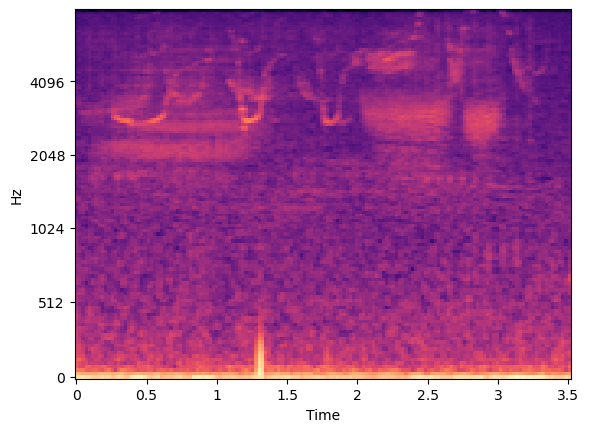

In [ ]:
# Convertir a espectrograma
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')

In [ ]:
# Audio original
print(f"Denoised sigal : {clase} - {archivo}")
ipd.Audio(denoised_y, rate=sr)

Denoised sigal : Deep_learning_UNAL - 61025001.wav


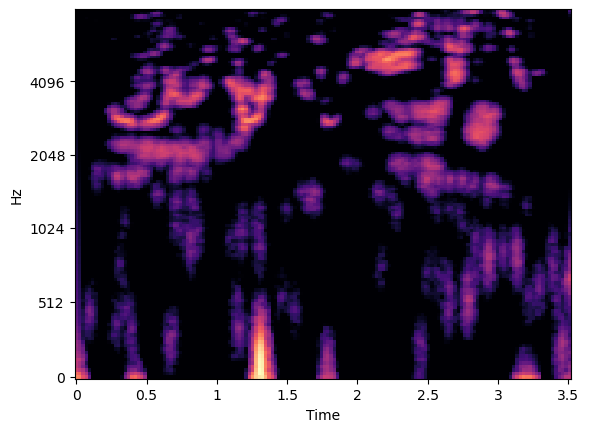

In [ ]:
# Convertir a espectrograma
spectrogram = librosa.feature.melspectrogram(y=denoised_y, sr=sr)
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')

In [ ]:
# Audio original
print(f"Filtered sigal : {clase} - {archivo}")
ipd.Audio(y_filtered, rate=sr)

Filtered sigal : Deep_learning_UNAL - 61025001.wav


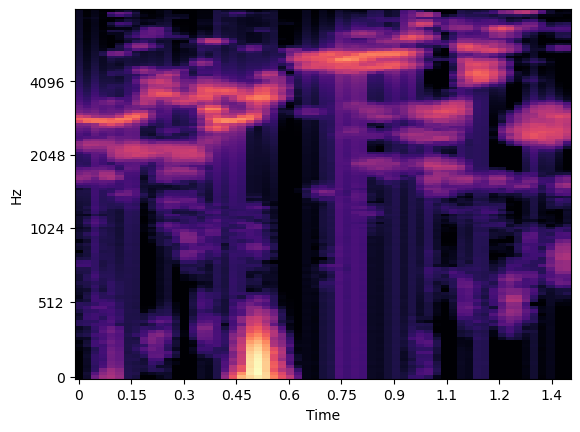

In [ ]:
# Convertir a espectrograma
spectrogram = librosa.feature.melspectrogram(y=y_filtered, sr=sr)
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')